In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import random as r
import warnings
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("vgsales.csv")
data.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
#lets find the no of null values in each column
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
## first lets handle the null values
for feature in data.columns:
    print("the no of unique features in {} is {}".format(feature,data[feature].nunique()))

the no of unique features in Rank is 16598
the no of unique features in Name is 11493
the no of unique features in Platform is 31
the no of unique features in Year is 39
the no of unique features in Genre is 12
the no of unique features in Publisher is 578
the no of unique features in NA_Sales is 409
the no of unique features in EU_Sales is 305
the no of unique features in JP_Sales is 244
the no of unique features in Other_Sales is 157
the no of unique features in Global_Sales is 623


In [7]:
## lets see the year and publisher columns
data[["Year","Publisher"]]

,Year,Publisher
0,2006.0,Nintendo
1,1985.0,Nintendo
2,2008.0,Nintendo
3,2009.0,Nintendo
4,1996.0,Nintendo
...,...,...
16593,2002.0,Kemco
16594,2003.0,Infogrames
16595,2008.0,Activision
16596,2010.0,7G//AMES


## so according to my observation lets fill the publisher columns nan values with "not known"

In [8]:
data[(data["Year"].isnull()) & data["Publisher"].isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46
4145,4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48
5302,5304,Dragon Ball Z: Budokai Tenkaichi 2 (JP sales),Wii,NaN,Action,NaN,0.15,0.05,0.14,0.01,0.35
6272,6274,The Legend of Zelda: The Minish Cap(weekly JP ...,GBA,NaN,Action,NaN,0.00,0.00,0.27,0.01,0.27
7351,7353,Yu Yu Hakusho: Dark Tournament,PS2,NaN,Fighting,NaN,0.10,0.08,0.00,0.03,0.21
9749,9751,Super Robot Wars OG Saga: Masou Kishin II - Re...,PSP,NaN,Strategy,NaN,0.00,0.00,0.12,0.00,0.12
10494,10496,Atsumare! Power Pro Kun no DS Koushien,DS,NaN,Sports,NaN,0.00,0.00,0.10,0.00,0.10
11076,11078,Action Man-Operation Extreme,PS,NaN,Action,NaN,0.05,0.03,0.00,0.01,0.09
12487,12489,Chou Soujuu Mecha MG,DS,NaN,Simulation,NaN,0.00,0.00,0.06,0.00,0.06


In [9]:
data[data["Year"].isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


In [10]:
print("The shape of data before dropping is {}".format(data.shape))

The shape of data before dropping is (16598, 11)


In [11]:
data1 = data.dropna()
data1.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [12]:
print("the shape of data after dropping is {}".format(data1.shape))

the shape of data after dropping is (16291, 11)


In [13]:
for feature in data1.columns:
    print("the no of unique features in {} is {}".format(feature,data1[feature].nunique()))

the no of unique features in Rank is 16291
the no of unique features in Name is 11325
the no of unique features in Platform is 31
the no of unique features in Year is 39
the no of unique features in Genre is 12
the no of unique features in Publisher is 576
the no of unique features in NA_Sales is 408
the no of unique features in EU_Sales is 305
the no of unique features in JP_Sales is 244
the no of unique features in Other_Sales is 157
the no of unique features in Global_Sales is 621


# now lets split our data into numerical and categorical features

In [14]:
numerical_features = [feature for feature in data1.columns if data1[feature].dtype != "O"]
categorical_features = [feature for feature in data1.columns if data1[feature].dtype == "O"]
print(numerical_features)
print(categorical_features)

['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
['Name', 'Platform', 'Genre', 'Publisher']


In [15]:
print("the number of categorical features are {}".format(len(categorical_features)))
print("the number of numerical features are {}".format(len(numerical_features)))

the number of categorical features are 4
the number of numerical features are 7


In [16]:
data1.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

## now our dataset is very clean now lets perform some exploratary data analysis

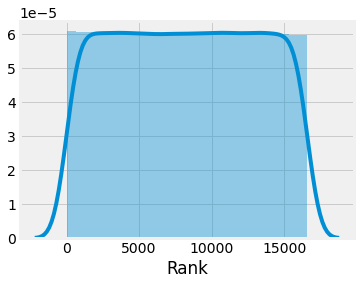

In [17]:
plt.figure()
plt.style.use('fivethirtyeight')
sn.distplot(data1[numerical_features[0]],
    bins=None,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None)

## AS rank is a continous we cant any sort of particular guassain distribution

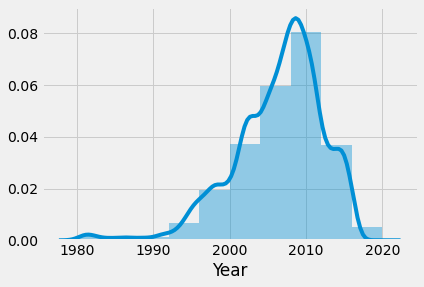

In [18]:
plt.figure()
sn.distplot(data1[numerical_features[1]],
    bins=10,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None)
plt.show()

# we can clearly see that most of the games have released in the year 2008 to 2010

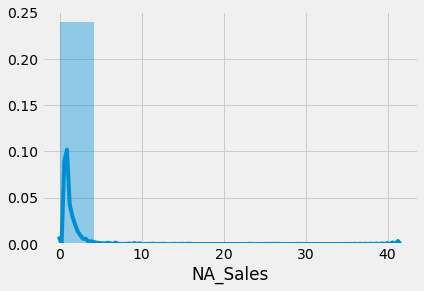

In [19]:
plt.figure()
sn.distplot(data1[numerical_features[2]],
    bins=10,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None)
plt.show()

# we cant find any particular pattern here

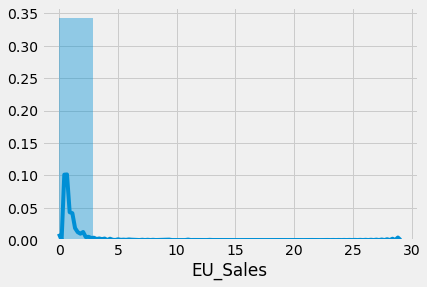

In [20]:
plt.figure()
sn.distplot(data1[numerical_features[3]],
    bins=10,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None)
plt.show()

# we cant find any particular pattern here

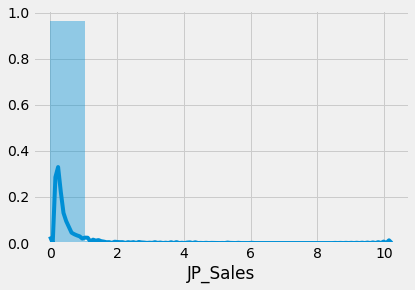

In [21]:
plt.figure()
sn.distplot(data1[numerical_features[4]],
    bins=10,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None)
plt.show()

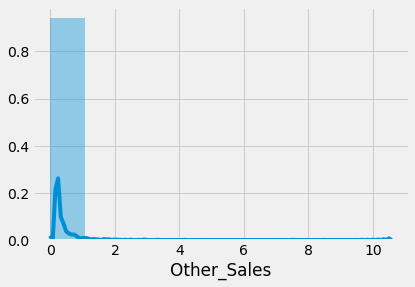

In [22]:
plt.figure()
sn.distplot(data1[numerical_features[5]],
    bins=10,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None)
plt.show()

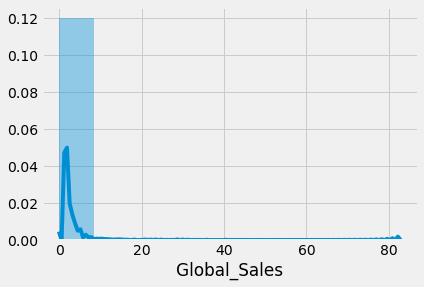

In [23]:
plt.figure()
sn.distplot(data1[numerical_features[6]],
    bins=10,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None)
plt.show()

# it seems like one dimensional data analysis did not help us much

<Figure size 432x288 with 0 Axes>

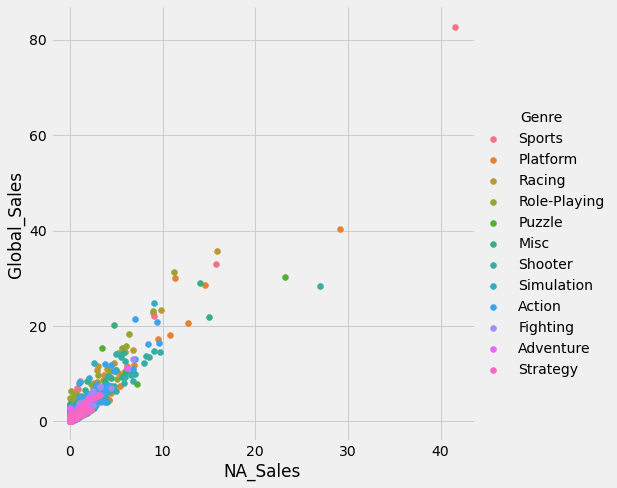

In [24]:
plt.figure()
sn.FacetGrid(data1,
    row=None,
    col=None,
    hue="Genre",
    col_wrap=None,
    sharex=True,
    sharey=True,
    height=7,
    aspect=1,
    palette=None,
    row_order=None,
    col_order=None,
    hue_order=None,
    hue_kws=None,
    dropna=True,
    legend_out=True,
    despine=True,
    margin_titles=False,
    xlim=None,
    ylim=None,
    subplot_kws=None,
    gridspec_kws=None,
    size=None).map(plt.scatter,"NA_Sales","Global_Sales").add_legend()
plt.show()

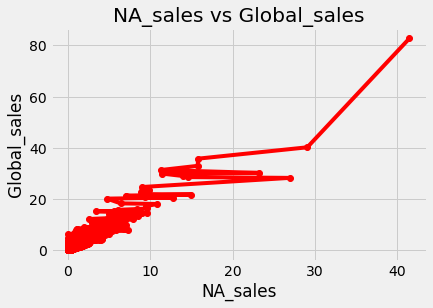

In [25]:
plt.plot(data1.NA_Sales,data1.Global_Sales,marker="o",color="red")
plt.xlabel("NA_sales")
plt.ylabel("Global_sales")
plt.title("NA_sales vs Global_sales")
plt.show()

# we can clearly see that as Na_sales increses global shares increases

<Figure size 432x288 with 0 Axes>

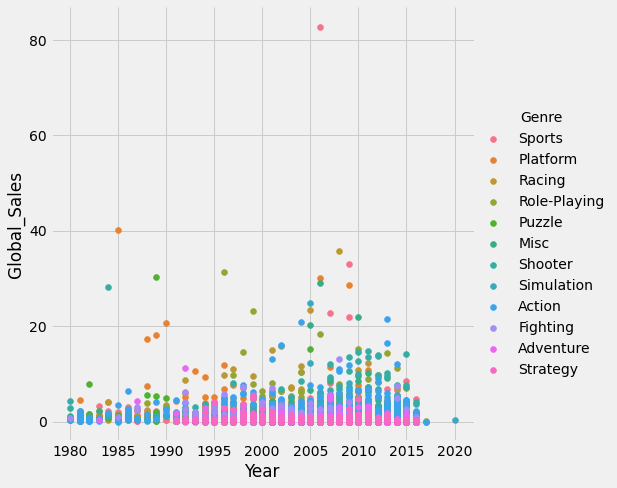

In [26]:
plt.figure()
sn.FacetGrid(data1,
    row=None,
    col=None,
    hue="Genre",
    col_wrap=None,
    sharex=True,
    sharey=True,
    height=7,
    aspect=1,
    palette=None,
    row_order=None,
    col_order=None,
    hue_order=None,
    hue_kws=None,
    dropna=True,
    legend_out=True,
    despine=True,
    margin_titles=False,
    xlim=None,
    ylim=None,
    subplot_kws=None,
    gridspec_kws=None,
    size=None).map(plt.scatter,numerical_features[1],"Global_Sales").add_legend()
plt.show()

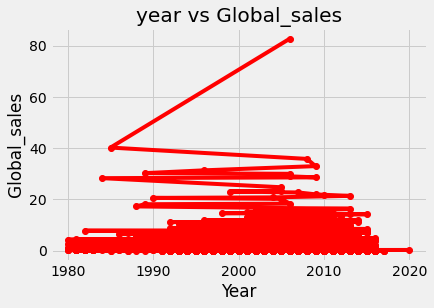

In [27]:
plt.plot(data1[numerical_features[1]],data1.Global_Sales,marker="o",color="red")
plt.xlabel("Year")
plt.ylabel("Global_sales")
plt.title("year vs Global_sales")
plt.show()

# the plot is looking a powerful tanker although it gives a good visualization but we can no information from this

<Figure size 432x288 with 0 Axes>

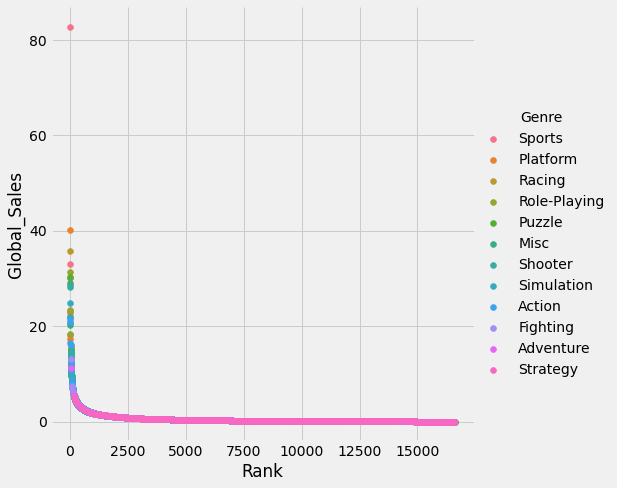

In [28]:
plt.figure()
sn.FacetGrid(data1,
    row=None,
    col=None,
    hue="Genre",
    col_wrap=None,
    sharex=True,
    sharey=True,
    height=7,
    aspect=1,
    palette=None,
    row_order=None,
    col_order=None,
    hue_order=None,
    hue_kws=None,
    dropna=True,
    legend_out=True,
    despine=True,
    margin_titles=False,
    xlim=None,
    ylim=None,
    subplot_kws=None,
    gridspec_kws=None,
    size=None).map(plt.scatter,numerical_features[0],"Global_Sales").add_legend()
plt.show()

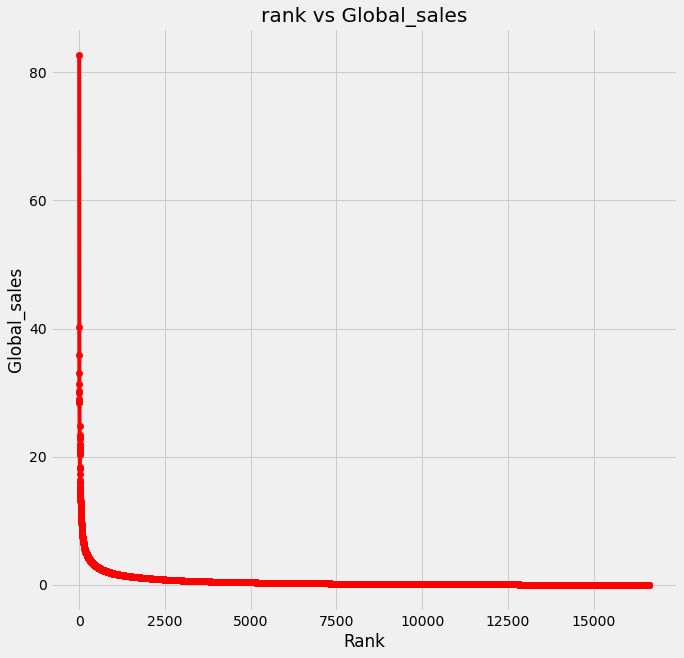

In [29]:
plt.figure(figsize=[10,10])
plt.plot(data1[numerical_features[0]],data1.Global_Sales,marker="o",color="red")
plt.xlabel("Rank")
plt.ylabel("Global_sales")
plt.title("rank vs Global_sales")
plt.show()

# we can clearly observe that as rank increases global shares decreases

<Figure size 432x288 with 0 Axes>

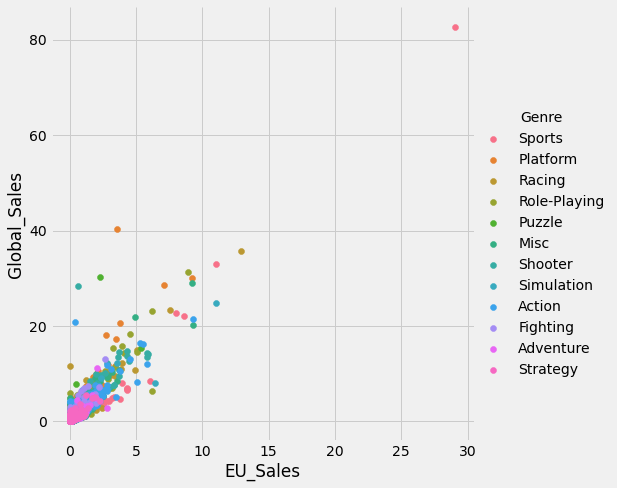

In [30]:
plt.figure()
sn.FacetGrid(data1,
    row=None,
    col=None,
    hue="Genre",
    col_wrap=None,
    sharex=True,
    sharey=True,
    height=7,
    aspect=1,
    palette=None,
    row_order=None,
    col_order=None,
    hue_order=None,
    hue_kws=None,
    dropna=True,
    legend_out=True,
    despine=True,
    margin_titles=False,
    xlim=None,
    ylim=None,
    subplot_kws=None,
    gridspec_kws=None,
    size=None).map(plt.scatter,numerical_features[3],"Global_Sales").add_legend()
plt.show()

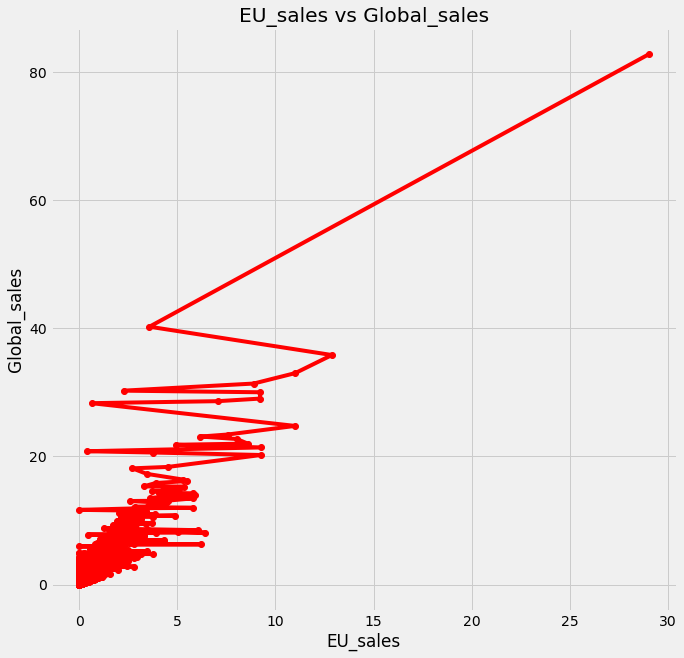

In [31]:
plt.figure(figsize=[10,10])
plt.plot(data1[numerical_features[3]],data1.Global_Sales,marker="o",color="red")
plt.xlabel("EU_sales")
plt.ylabel("Global_sales")
plt.title("EU_sales vs Global_sales")
plt.show()

# we can see that as Eu_sales increase global share increases

<Figure size 432x288 with 0 Axes>

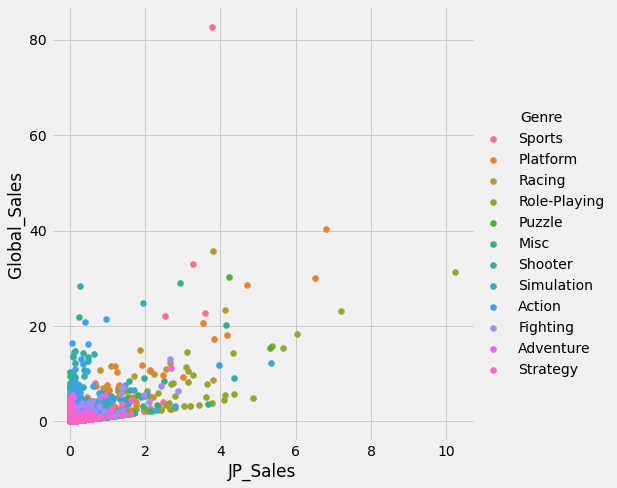

In [32]:
plt.figure()
sn.FacetGrid(data1,
    row=None,
    col=None,
    hue="Genre",
    col_wrap=None,
    sharex=True,
    sharey=True,
    height=7,
    aspect=1,
    palette=None,
    row_order=None,
    col_order=None,
    hue_order=None,
    hue_kws=None,
    dropna=True,
    legend_out=True,
    despine=True,
    margin_titles=False,
    xlim=None,
    ylim=None,
    subplot_kws=None,
    gridspec_kws=None,
    size=None).map(plt.scatter,numerical_features[4],"Global_Sales").add_legend()
plt.show()

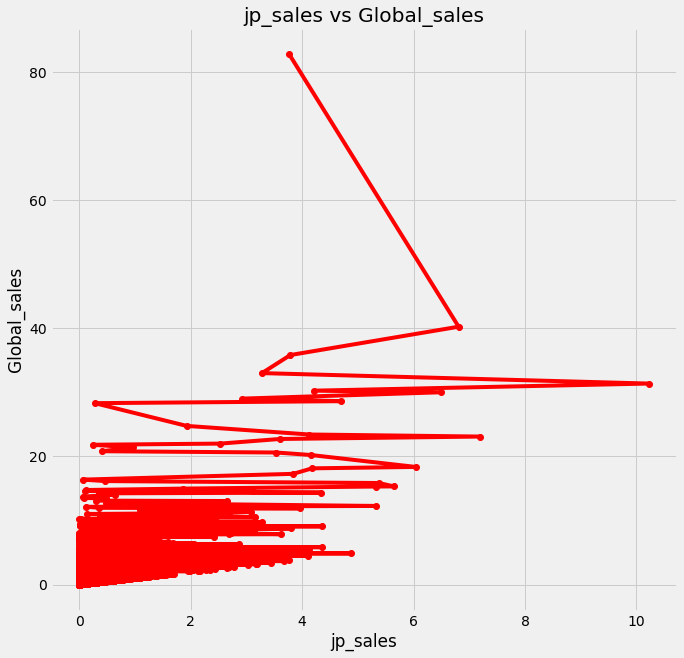

In [33]:
plt.figure(figsize=[10,10])
plt.plot(data1[numerical_features[4]],data1.Global_Sales,marker="o",color="red")
plt.xlabel("jp_sales")
plt.ylabel("Global_sales")
plt.title("jp_sales vs Global_sales")
plt.show()

<Figure size 432x288 with 0 Axes>

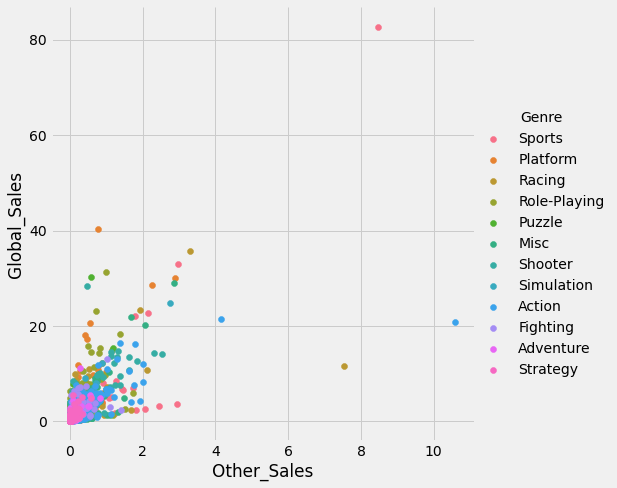

In [34]:
plt.figure()
sn.FacetGrid(data1,
    row=None,
    col=None,
    hue="Genre",
    col_wrap=None,
    sharex=True,
    sharey=True,
    height=7,
    aspect=1,
    palette=None,
    row_order=None,
    col_order=None,
    hue_order=None,
    hue_kws=None,
    dropna=True,
    legend_out=True,
    despine=True,
    margin_titles=False,
    xlim=None,
    ylim=None,
    subplot_kws=None,
    gridspec_kws=None,
    size=None).map(plt.scatter,numerical_features[5],"Global_Sales").add_legend()
plt.show()

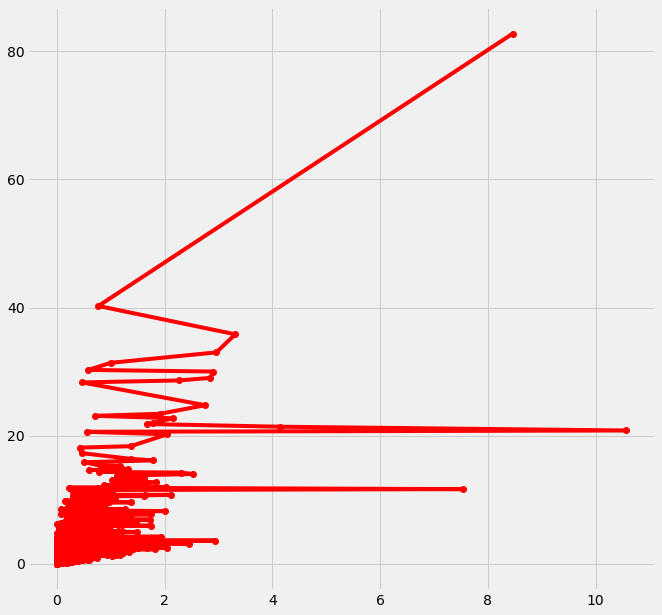

In [35]:
plt.figure(figsize=[10,10])
plt.plot(data1[numerical_features[5]],data1.Global_Sales,marker="o",color="red")
plt.show()

<Figure size 432x288 with 0 Axes>

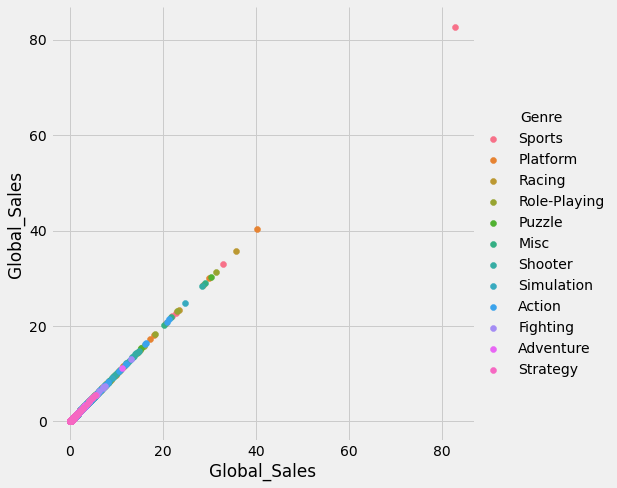

In [36]:
plt.figure()
sn.FacetGrid(data1,
    row=None,
    col=None,
    hue="Genre",
    col_wrap=None,
    sharex=True,
    sharey=True,
    height=7,
    aspect=1,
    palette=None,
    row_order=None,
    col_order=None,
    hue_order=None,
    hue_kws=None,
    dropna=True,
    legend_out=True,
    despine=True,
    margin_titles=False,
    xlim=None,
    ylim=None,
    subplot_kws=None,
    gridspec_kws=None,
    size=None).map(plt.scatter,numerical_features[6],"Global_Sales").add_legend()
plt.show()

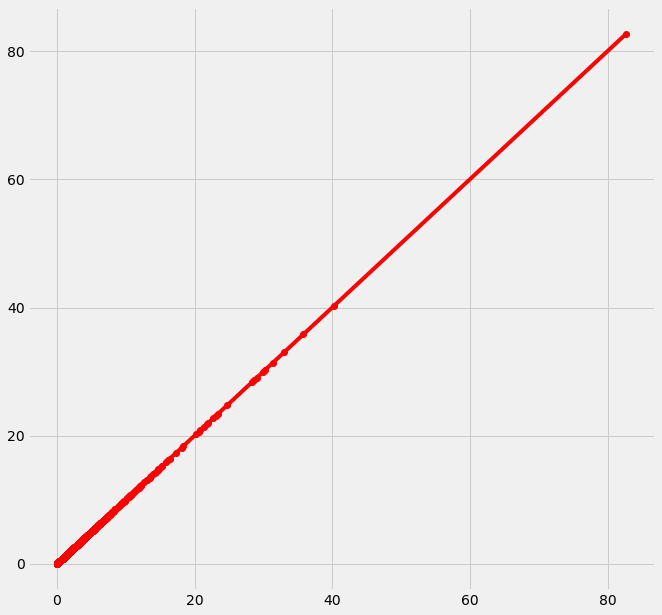

In [37]:
plt.figure(figsize=[10,10])
plt.plot(data1[numerical_features[6 ]],data1.Global_Sales,marker="o",color="red")
plt.show()

## from our 2-dimesnional analysis we can clearly see that as the sales in different continents increase the global sales of the game have been increasing but the main observation we can make here is that that different continents have different types of games liked by most of the people

<Figure size 1440x1440 with 0 Axes>

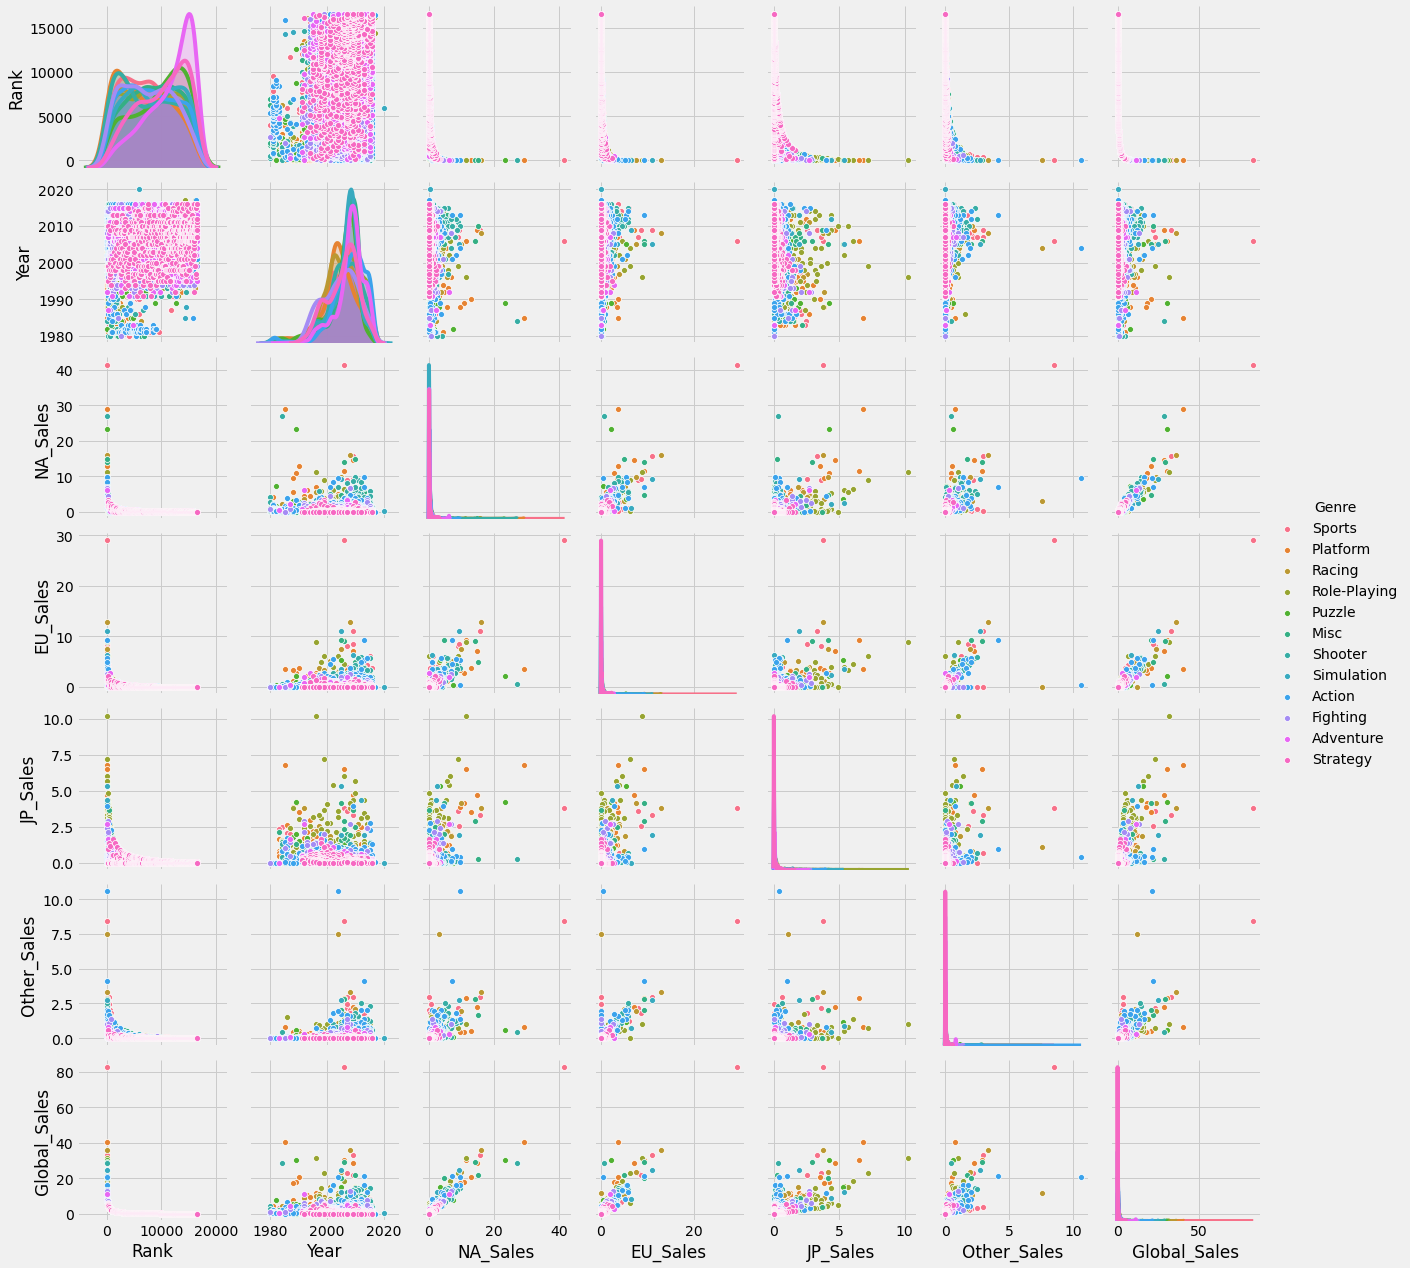

In [38]:
# lets perform multidemisonal analyis using pairplot
plt.figure(figsize=[20,20])
sn.pairplot(data1,
    hue="Genre",
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    kind='scatter',
    diag_kind='auto',
    markers=None,
    height=2.5,
    aspect=1,
    corner=False,
    dropna=True,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=None)

In [39]:
# now lets perform some eda on categorical features
data1[categorical_features].head()

,Name,Platform,Genre,Publisher
0,Wii Sports,Wii,Sports,Nintendo
1,Super Mario Bros.,NES,Platform,Nintendo
2,Mario Kart Wii,Wii,Racing,Nintendo
3,Wii Sports Resort,Wii,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo


# name doesnt help us in any way in either eda or model buliding so lets ignore it

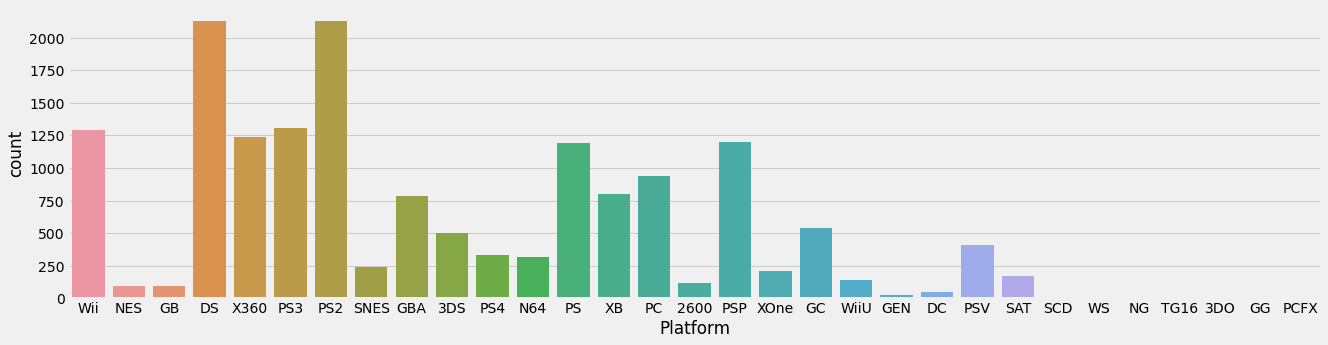

In [40]:
#finding the count of roes of categorical features
plt.figure(figsize=[20,5])
sn.countplot(x=categorical_features[1],
    y=None,
    hue=None,
    data=data1,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    dodge=True,
    ax=None)
plt.show()

# we can see that most of the games are from ds,ps3,ps2,pc,xb and platfroms like scd,ws,ng,tg16,3d0,gg,pcfx have almost o games

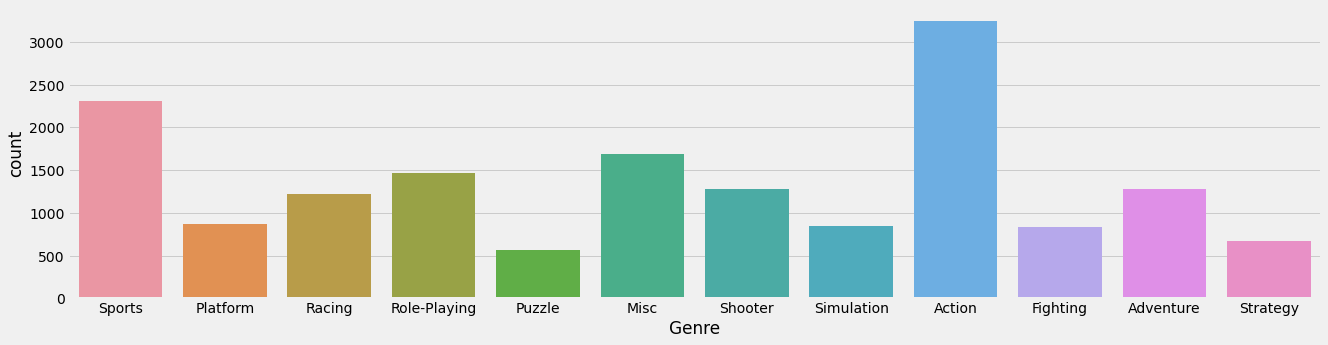

In [41]:
#finding the count of roes of categorical features
plt.figure(figsize=[20,5])
sn.countplot(x=categorical_features[2],
    y=None,
    hue=None,
    data=data1,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    dodge=True,
    ax=None)
plt.show()

# the type depicts the type of games and its count and we can see that there is no huge diiffersnce between them but sports and action are the most made games 

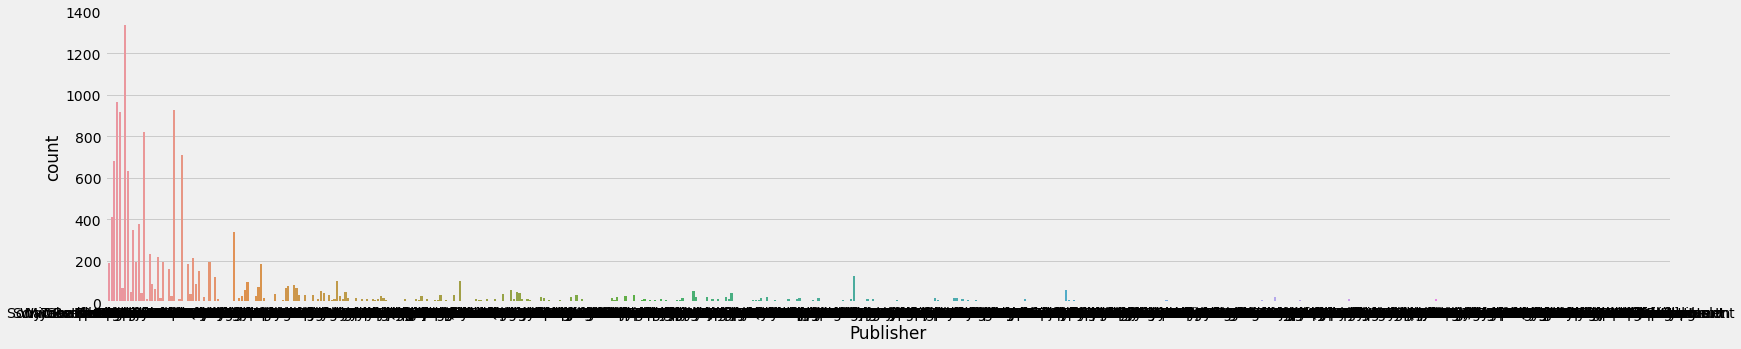

In [42]:
#finding the count of roes of categorical features
plt.figure(figsize=[25,5])
sn.countplot(x=categorical_features[3],
    y=None,
    hue=None,
    data=data1,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    dodge=True,
    ax=None)
plt.show()

# as there are more categorical features our plot seems scribbled now lets take the top 25 categories and analyze them

In [43]:
publishers = data1["Publisher"].value_counts().sort_values(ascending=False).head(25)
names = list(publishers.index)
print(names)
counts = list(publishers.values)
print(counts)

['Electronic Arts', 'Activision', 'Namco Bandai Games', 'Ubisoft', 'Konami Digital Entertainment', 'THQ', 'Nintendo', 'Sony Computer Entertainment', 'Sega', 'Take-Two Interactive', 'Capcom', 'Atari', 'Tecmo Koei', 'Square Enix', 'Warner Bros. Interactive Entertainment', 'Disney Interactive Studios', 'Midway Games', 'Eidos Interactive', '505 Games', 'Microsoft Game Studios', 'Acclaim Entertainment', 'D3Publisher', 'Vivendi Games', 'Codemasters', 'Idea Factory']
[1339, 966, 928, 918, 823, 712, 696, 682, 632, 412, 376, 347, 338, 231, 217, 214, 196, 196, 192, 189, 184, 183, 161, 150, 128]


In [61]:
color_names = ["red","green","yellow","blue","orange","pink"]
colors = []
for i in range(25):
    colors.append(r.choice(color_names))
print(colors)

['pink', 'pink', 'blue', 'yellow', 'green', 'blue', 'orange', 'orange', 'orange', 'blue', 'yellow', 'green', 'blue', 'orange', 'blue', 'orange', 'blue', 'yellow', 'orange', 'pink', 'green', 'blue', 'red', 'blue', 'blue']


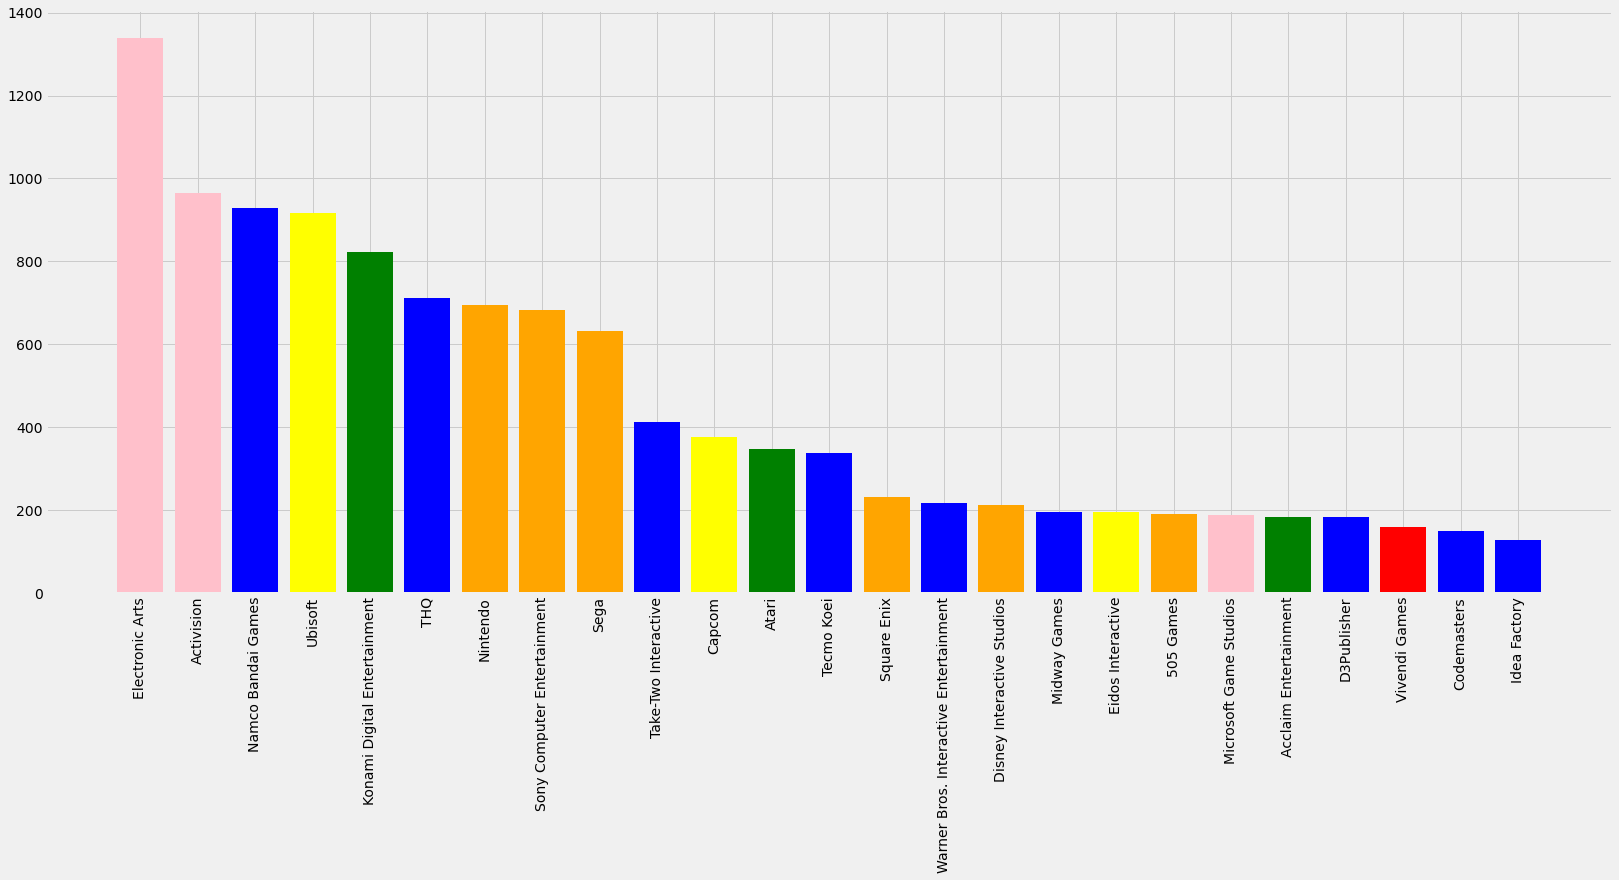

In [62]:
ypos = np.arange(len(names))
plt.figure(figsize=[25,10])
plt.xticks(ypos,names)
plt.bar(ypos,counts,color=colors)
plt.xticks(rotation=90)
plt.show()

# now we can see that most of the games are published by these comapnies

In [46]:
data1[categorical_features].head()

,Name,Platform,Genre,Publisher
0,Wii Sports,Wii,Sports,Nintendo
1,Super Mario Bros.,NES,Platform,Nintendo
2,Mario Kart Wii,Wii,Racing,Nintendo
3,Wii Sports Resort,Wii,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo


<Figure size 1800x360 with 0 Axes>

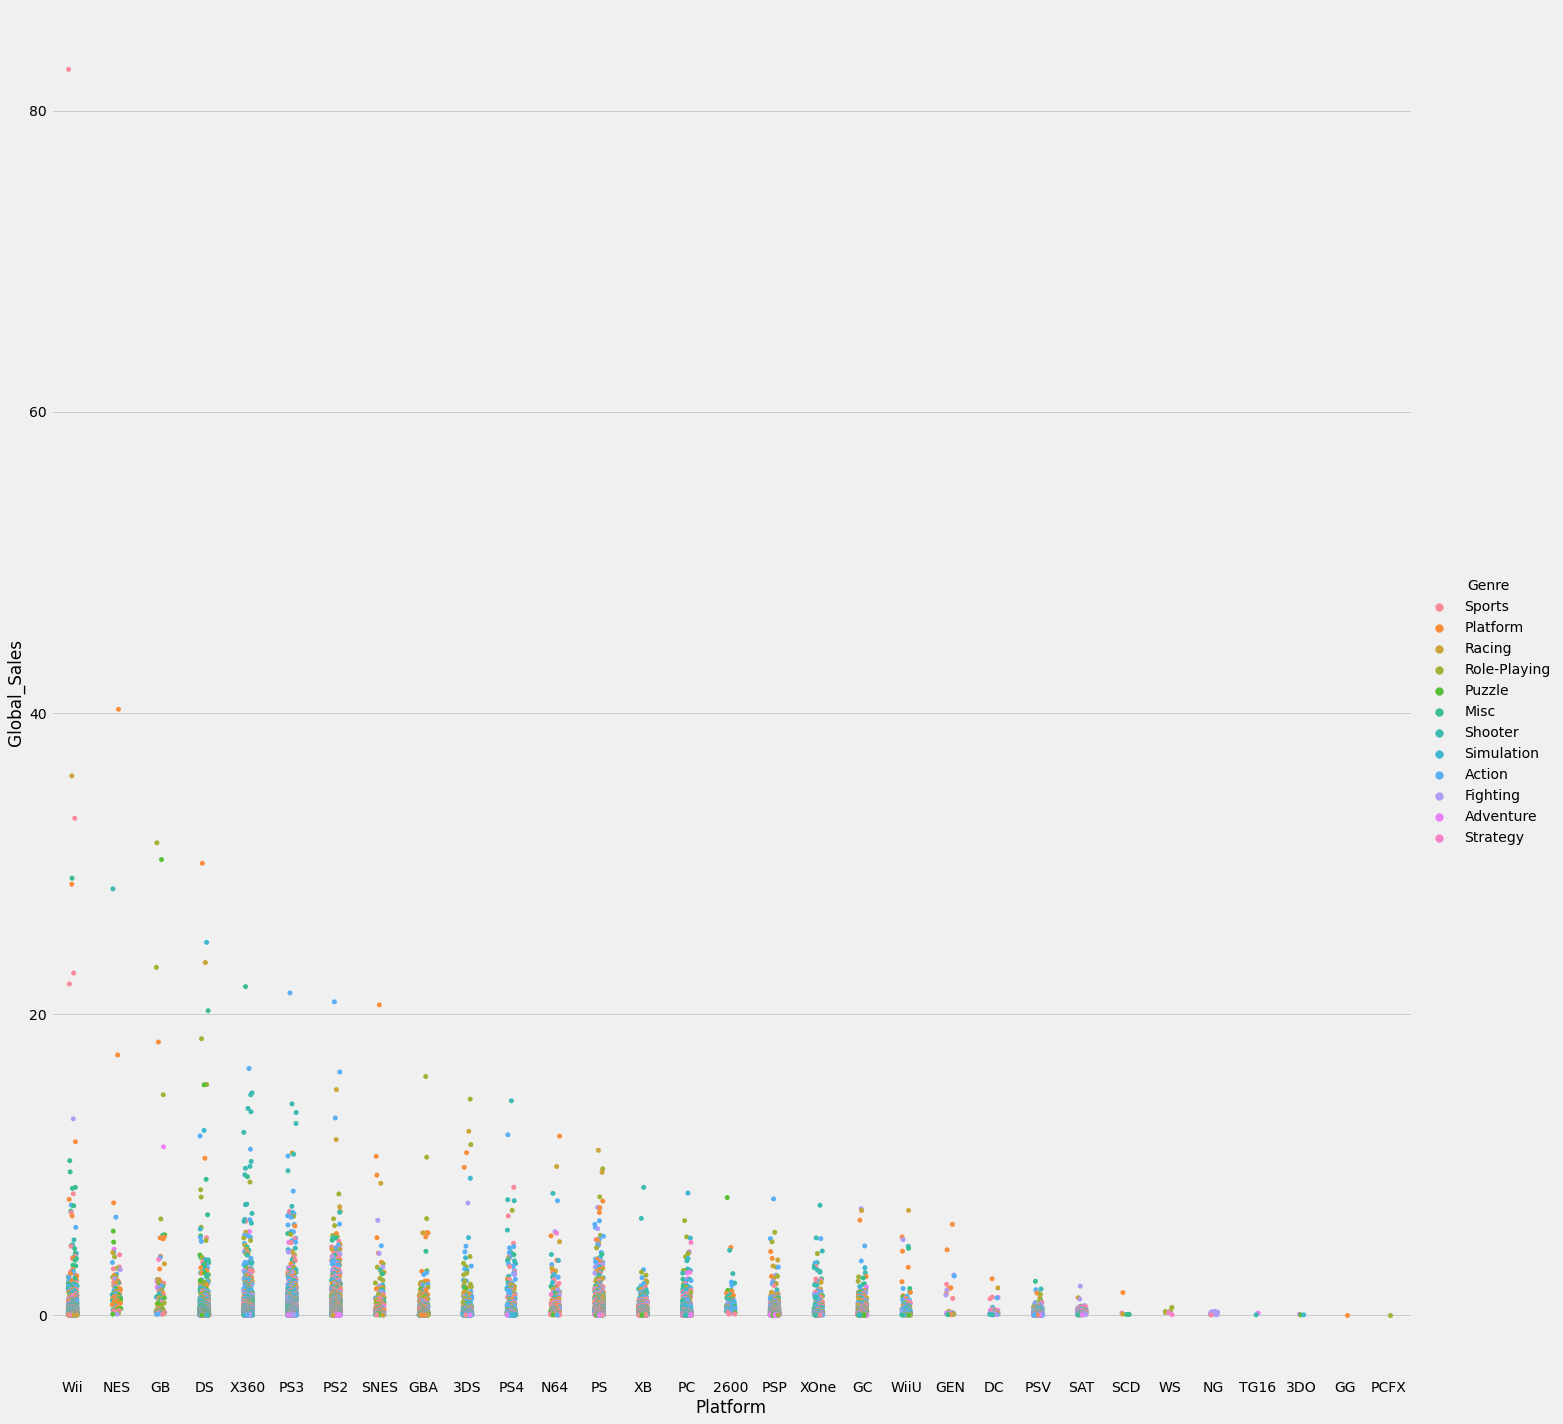

In [57]:
plt.figure(figsize=[25,5])
sn.catplot("Platform",
    y="Global_Sales",
    hue="Genre",
    data=data1,
    row=None,
    col=None,
    col_wrap=None,
    ci=95,
    n_boot=1000,
    units=None,
    seed=None,
    order=None,
    hue_order=None,
    row_order=None,
    col_order=None,
    kind='strip',
    height=20,
    aspect=1,
    orient=None,
    color=None,
    palette=None,
    legend=True,
    legend_out=True,
    sharex=True,
    sharey=True,
    margin_titles=False,
    facet_kws=None)
plt.show()

# we can see that most of the high marketing games are from wii,nes,ds,x360,ps3 platforms

<Figure size 1800x360 with 0 Axes>

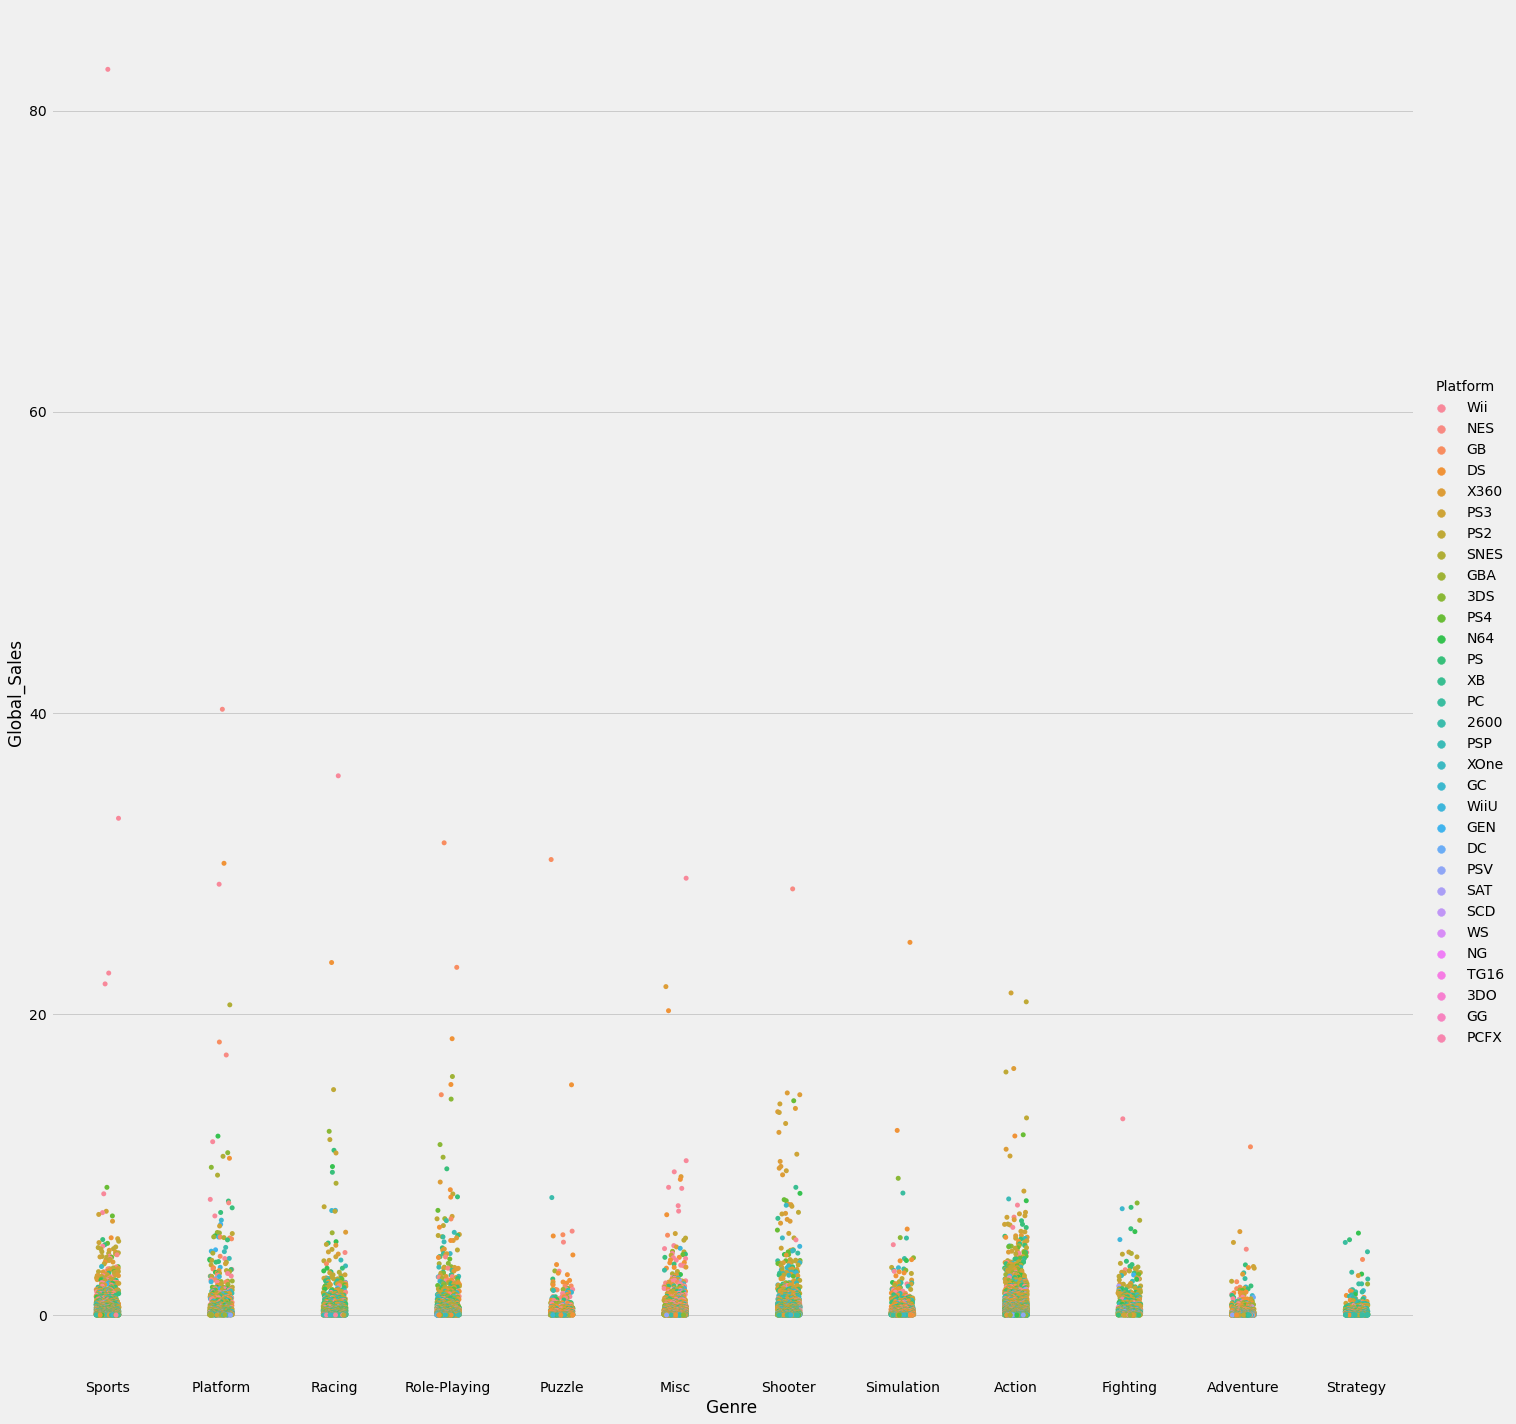

In [59]:
plt.figure(figsize=[25,5])
sn.catplot("Genre",
    y="Global_Sales",
    hue="Platform",
    data=data1,
    row=None,
    col=None,
    col_wrap=None,
    ci=95,
    n_boot=1000,
    units=None,
    seed=None,
    order=None,
    hue_order=None,
    row_order=None,
    col_order=None,
    kind='strip',
    height=20,
    aspect=1,
    orient=None,
    color=None,
    palette=None,
    legend=True,
    legend_out=True,
    sharex=True,
    sharey=True,
    margin_titles=False,
    facet_kws=None)
plt.show()

# now lets start datapreprocessing

In [63]:
data1.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [78]:
data1 = data1.drop("Name",axis=1)

In [79]:
#independent features
x = data1.drop("Global_Sales",axis=1)
#dependent features
y = data1["Global_Sales"]

In [80]:
print("the shape of dependent feature is {}".format(x.shape))
print("the shape of independent feature is {}".format(y.shape))

the shape of dependent feature is (16291, 9)
the shape of independent feature is (16291,)


## lets check the correlation between features

In [81]:
correlation = data1.corr()
correlation

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178027,-0.400315,-0.379137,-0.269323,-0.332735,-0.426975
Year,0.178027,1.000000,-0.091285,0.006108,-0.169387,0.041128,-0.074647
NA_Sales,-0.400315,-0.091285,1.000000,0.768923,0.451283,0.634518,0.941269
EU_Sales,-0.379137,0.006108,0.768923,1.000000,0.436379,0.726256,0.903264
JP_Sales,-0.269323,-0.169387,0.451283,0.436379,1.000000,0.290559,0.612774
Other_Sales,-0.332735,0.041128,0.634518,0.726256,0.290559,1.000000,0.747964
Global_Sales,-0.426975,-0.074647,0.941269,0.903264,0.612774,0.747964,1.000000


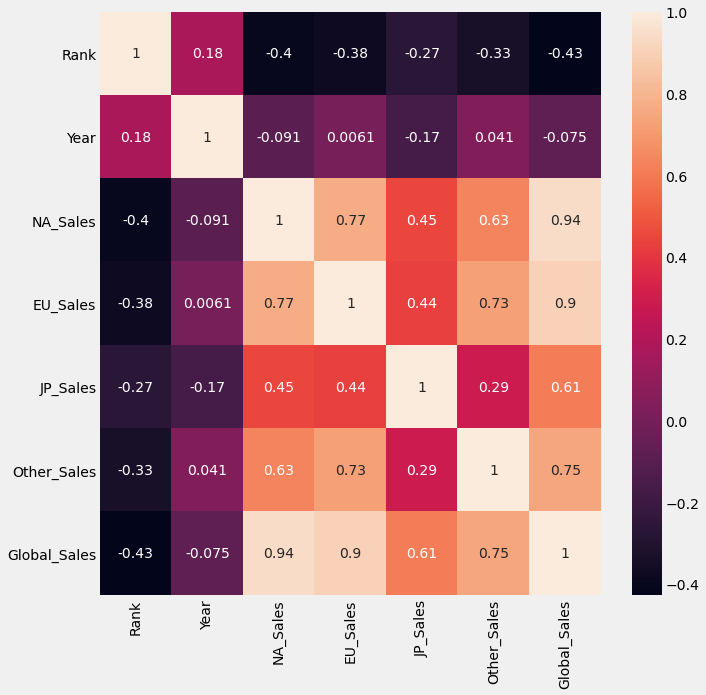

In [82]:
plt.figure(figsize=[10,10])
sn.heatmap(correlation,annot=True)
plt.show()

In [86]:
data1.head()

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [88]:
data2 = pd.get_dummies(data1[["Platform","Genre"]],drop_first=True)
data2.head()

,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,Platform_N64,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [94]:
data1["Publisher"].value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Number None                        1
Interworks Unlimited, Inc.         1
Intergrow                          1
Phantom EFX                        1
Naxat Soft                         1
Name: Publisher, Length: 576, dtype: int64

In [96]:
top_10_values = [value for value in data1["Publisher"].value_counts().sort_values(ascending=False).head(10).index]
print(top_10_values)

['Electronic Arts', 'Activision', 'Namco Bandai Games', 'Ubisoft', 'Konami Digital Entertainment', 'THQ', 'Nintendo', 'Sony Computer Entertainment', 'Sega', 'Take-Two Interactive']


In [98]:
for x in top_10_values:
    data1[x] = np.where(data1['Publisher']==x,1,0)

In [99]:
data1.head()

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Electronic Arts,Activision,Namco Bandai Games,Ubisoft,Konami Digital Entertainment,THQ,Nintendo,Sony Computer Entertainment,Sega,Take-Two Interactive
0,1,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0,0,0,0,0,0,1,0,0,0
1,2,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0,0,0,0,0,0,1,0,0,0
2,3,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0,0,0,0,0,0,1,0,0,0
3,4,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0,0,0,0,0,0,1,0,0,0
4,5,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0,0,0,0,0,0,1,0,0,0


In [103]:
pd.set_option("display.max_columns",None)

In [104]:
data3 = pd.concat([data1,data2],axis=1)
data3.head()

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Electronic Arts,Activision,Namco Bandai Games,Ubisoft,Konami Digital Entertainment,THQ,Nintendo,Sony Computer Entertainment,Sega,Take-Two Interactive,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,Platform_N64,Platform_NES,Platform_NG,Platform_PC,Platform_PCFX,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,1,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [111]:
data3.drop(["Platform"],axis=1,inplace=True)

In [113]:
data3.drop(['Genre','Publisher'],axis=1,inplace=True)

In [114]:
data3.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Electronic Arts,Activision,Namco Bandai Games,Ubisoft,Konami Digital Entertainment,THQ,Nintendo,Sony Computer Entertainment,Sega,Take-Two Interactive,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,Platform_N64,Platform_NES,Platform_NG,Platform_PC,Platform_PCFX,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,1,2006.0,41.49,29.02,3.77,8.46,82.74,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,1985.0,29.08,3.58,6.81,0.77,40.24,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,2008.0,15.85,12.88,3.79,3.31,35.82,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,2009.0,15.75,11.01,3.28,2.96,33.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5,1996.0,11.27,8.89,10.22,1.00,31.37,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## now our data is cleaned and ready to be fitted to an machine learning algorithm

In [115]:
independent = data3.drop("Global_Sales",axis=1)
dependent = data3["Global_Sales"]
print("the size of independent data is {}".format(independent.shape))
print("the size of dependent data is {}".format(dependent.shape))

the size of independent data is (16291, 57)
the size of dependent data is (16291,)


In [116]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split( independent, dependent, test_size=0.33, random_state=42)

In [117]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10914, 57)
(5377, 57)
(10914,)
(5377,)


In [118]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)

LinearRegression()

In [119]:
lin_model.score(x_train,y_train)

0.9999875129010266

In [121]:
lin_model.score(x_test,y_test)

0.999991012763222

In [122]:
train_predict = lin_model.predict(x_train)
test_predict = lin_model.predict(x_test)

In [124]:
#lets see the error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,train_predict)

2.661818172639276e-05

In [125]:
from sklearn.metrics import r2_score
r2_score(y_train,train_predict)

0.9999875129010266

## now lets visualize the prediction

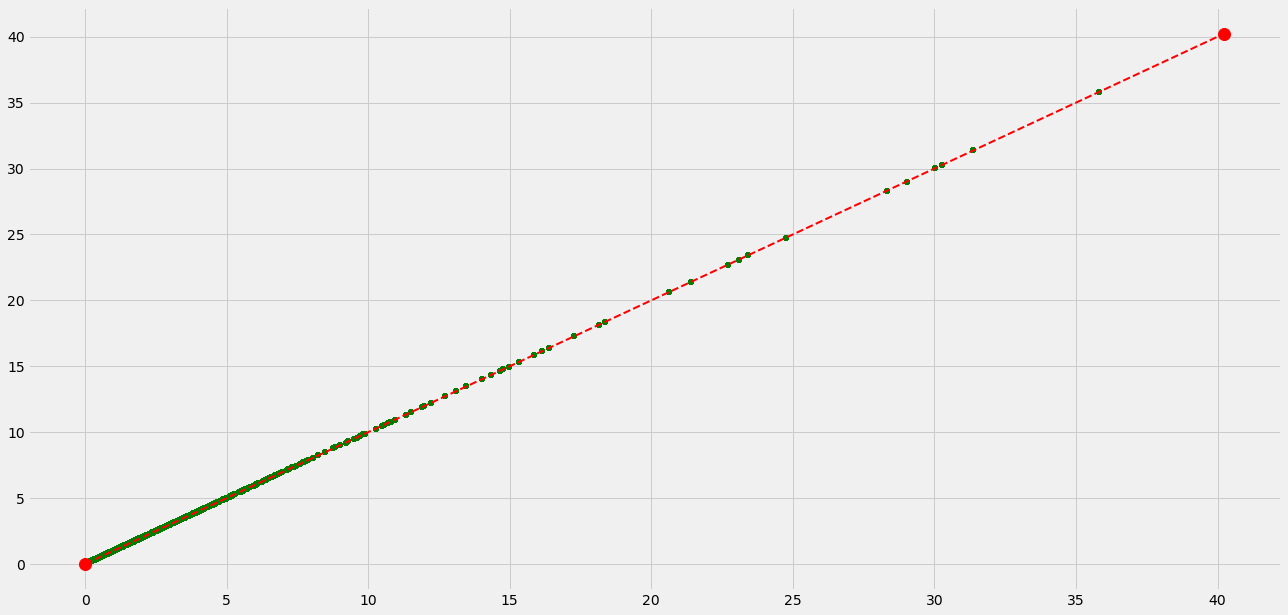

In [135]:
plt.figure(figsize=[20,10])
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()], color='red', marker='o', linestyle='dashed',
         linewidth=2, markersize=12)
plt.scatter(y_train,train_predict,color="green",marker='+')
plt.show()

# we can clearly our model almost correctly fits the data

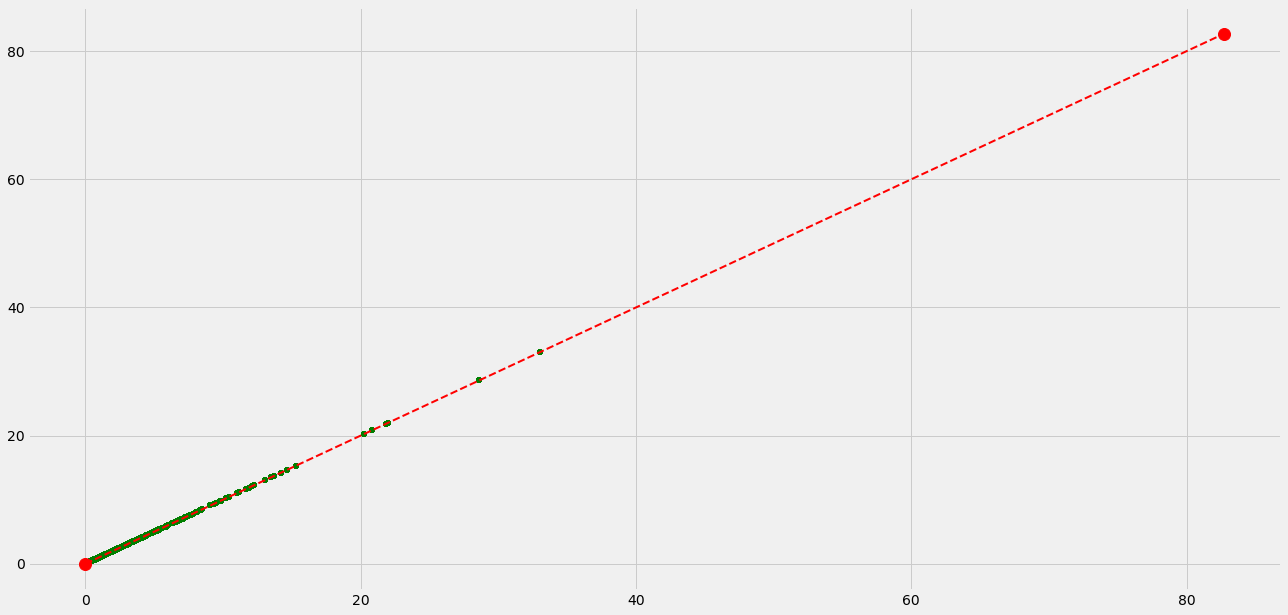

In [136]:
## lets check with testing data
plt.figure(figsize=[20,10])
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color='red', marker='o', linestyle='dashed',
         linewidth=2, markersize=12)
plt.scatter(y_test,test_predict,color="green",marker='+')
plt.show()

# our model is a genaralized model so yes we have made the model and lets deploy it after i learn web devolopment